In [29]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [30]:
df = pd.read_csv('flights_final.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97682 entries, 0 to 97681
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mkt_carrier          97682 non-null  int64  
 1   origin               97682 non-null  int64  
 2   dest                 97682 non-null  int64  
 3   dep_delay            97682 non-null  float64
 4   arr_delay            97682 non-null  float64
 5   crs_elapsed_time     97682 non-null  int64  
 6   actual_elapsed_time  97682 non-null  float64
 7   air_time             97682 non-null  float64
 8   distance             97682 non-null  int64  
 9   month                97682 non-null  int64  
 10  weekday              97682 non-null  int64  
 11  dep_hour             97682 non-null  int64  
 12  time_cat             97682 non-null  int64  
 13  avg_delay            97682 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 10.4 MB


In [28]:
df1 = pd.read_csv('test_df.csv')
df1 = df1.drop(['Unnamed: 0'],axis=1)
df1.head()


,mkt_carrier,origin,dest,crs_elapsed_time,distance,dep_time_format,weekday,month
0,9,246,312,95,363,18,2,1
1,9,246,312,90,363,11,2,1
2,9,246,318,70,333,20,2,1
3,9,246,318,75,333,13,2,1
4,9,246,318,80,333,9,2,1


In [44]:
df1.values.shape

(150623, 8)

In [41]:
df.head()

,mkt_carrier,origin,dest,dep_delay,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,month,weekday,dep_hour,time_cat,avg_delay
0,2,74,145,-6.0,-4.0,59,61.0,31.0,83,11,2,16,2,0.363720
1,2,249,95,40.0,24.0,70,54.0,34.0,175,12,3,17,3,50.452426
2,7,349,316,-6.0,0.0,120,126.0,100.0,727,10,3,9,2,0.363720
3,3,22,363,19.0,31.0,71,83.0,43.0,250,6,0,14,3,50.452426
4,6,118,127,19.0,-10.0,186,157.0,137.0,1065,11,2,17,1,-10.006351


In [45]:
df.shape

(97682, 14)

In [31]:
X = df.drop(['time_cat','arr_delay','dep_delay','actual_elapsed_time','avg_delay','air_time'],axis=1)
y = df['time_cat']

In [32]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [33]:
X_test, X_train, y_test, y_train = train_test_split(scaled_df, y, test_size=0.30, random_state=42)

In [34]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [46]:

training_preds = clf.predict(X_train)
y_pred = clf.predict(df1.values)

#training_accuracy = accuracy_score(y_train, training_preds)
#val_accuracy = accuracy_score(y_test, y_pred)

#print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
#print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
pred = pd.DataFrame(y_pred)

In [38]:
confusion_matrix(y_test,y_pred)

array([[7093, 4059, 2962, 3660],
       [4764, 5230, 3885, 3697],
       [4350, 4496, 3958, 3853],
       [3989, 3264, 3028, 6089]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.40      0.37     17774
           1       0.31      0.30      0.30     17576
           2       0.29      0.24      0.26     16657
           3       0.35      0.37      0.36     16370

    accuracy                           0.33     68377
   macro avg       0.32      0.33      0.32     68377
weighted avg       0.32      0.33      0.32     68377



### ROC curve 

In [39]:
y_score1 = clf.predict_proba(X_test)[:,1]
y_score2 = clf.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

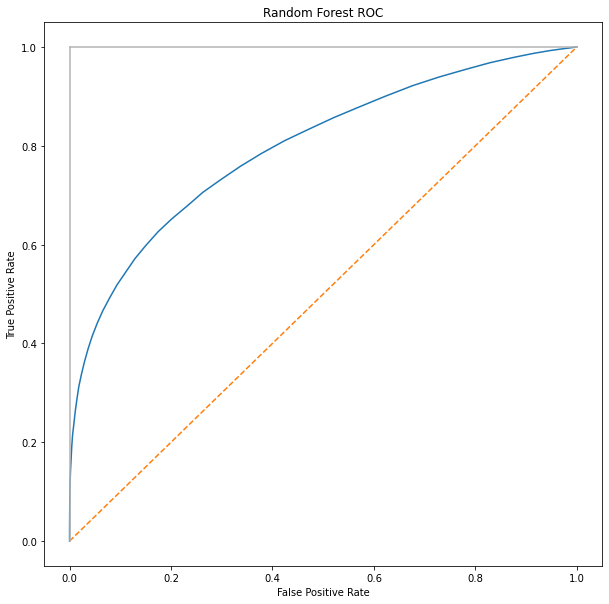

roc_auc_score:  0.7971104745884764


In [40]:
plt.subplots(1, figsize=(10,10))
plt.title('Random Forest ROC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('roc_auc_score: ', roc_auc_score(y_test, y_score1))